#### Importing Libraries 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data

In [60]:
# Trying different encodings
encodings = ['ISO-8859-1', 'latin1', 'cp1252', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv('customer_booking.csv', encoding=encoding)
        print('Data loading successful...')
        break  # Break the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to decode with {encoding}")

Data loading successful...


In [61]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [63]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

#### Handling Categorical Variable

In [64]:
# get the categorical variables 
categorical_features = df.select_dtypes(include = ['object']).columns
categorical_features = list(categorical_features)
print(categorical_features)

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


In [65]:
df[categorical_features].describe()

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [66]:
# convert categorical variables using one-hot encoding 
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

#### Splitting Data into Features and Target 

In [67]:
# Define the freature(X) and the target(y)
X = df.drop('booking_complete', axis= 1)
y = df['booking_complete']

#### Splitting Data into Training and Testing Sets

In [68]:
# Split the data into training and testing sets to evaluate the model's performance.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Perfroming Cross-validatoin and evaluating model 

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Specify the evaluation metric(s) you want to use (e.g., accuracy, precision, recall, F1-score)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation and obtain scores for each metric
cv_results = {}
for metric in scoring_metrics:
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=metric)
    cv_results[metric] = scores

# Print the cross-validation results
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()} Cross-Validation Scores: {scores}")
    print(f"Mean {metric.capitalize()} Score: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}\n")


Accuracy Cross-Validation Scores: [0.84675  0.849625 0.847875 0.845625 0.85475 ]
Mean Accuracy Score: 0.8489
Standard Deviation: 0.0032

Precision Cross-Validation Scores: [0.4548495  0.49180328 0.46931408 0.43494424 0.56884058]
Mean Precision Score: 0.4840
Standard Deviation: 0.0463

Recall Cross-Validation Scores: [0.11342786 0.1000834  0.10833333 0.0975     0.13083333]
Mean Recall Score: 0.1100
Standard Deviation: 0.0119

F1 Cross-Validation Scores: [0.18157543 0.16632017 0.1760325  0.15929204 0.21273713]
Mean F1 Score: 0.1792
Standard Deviation: 0.0185



#### Model prediction Before Balancing Class Weights

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.utils import class_weight


# Perform cross-validation predictions
y_pred_cv = cross_val_predict(rf_model, X_train, y_train, cv=5)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)
classification_rep_cv = classification_report(y_train, y_pred_cv)

# Print the results
print("Before Balancing Class Weights:")
print(f"Confusion Matrix Unbalance Weight:\n{conf_matrix_cv}")
print(f"Classification Report:\n{classification_rep_cv}\n")

Before Balancing Class Weights:
Confusion Matrix Unbalance Weight:
[[33297   705]
 [ 5338   660]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     34002
           1       0.48      0.11      0.18      5998

    accuracy                           0.85     40000
   macro avg       0.67      0.54      0.55     40000
weighted avg       0.81      0.85      0.81     40000




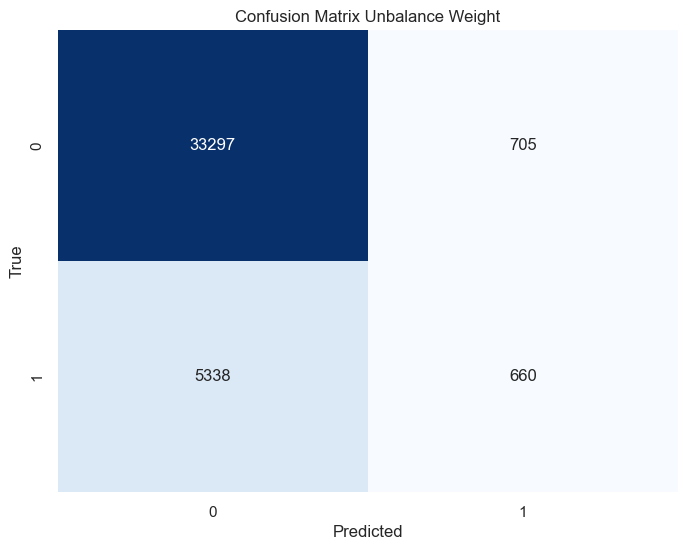

In [84]:
# Set the style for seaborn
sns.set()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Unbalance Weight')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Model prediction after Balancing Class Weights

In [81]:
# Calculate class weights to handle imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Re-initialize the RandomForestClassifier with class weights
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight=dict(enumerate(class_weights)))

# Retrain the model with balanced class weights
rf_model_balanced.fit(X_train, y_train)

# Evaluate the model with balanced class weights
y_pred_balanced = rf_model_balanced.predict(X_train)
conf_matrix_balanced = confusion_matrix(y_train, y_pred_balanced)
classification_rep_balanced = classification_report(y_train, y_pred_balanced)


print("After Balancing Class Weights:")
print(f"Confusion Matrix Balanced Weight:\n{conf_matrix_balanced}")
print(f"\nClassification Report:\n{classification_rep_balanced}")

After Balancing Class Weights:
Confusion Matrix Balanced Weight:
[[33997     5]
 [    0  5998]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34002
           1       1.00      1.00      1.00      5998

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



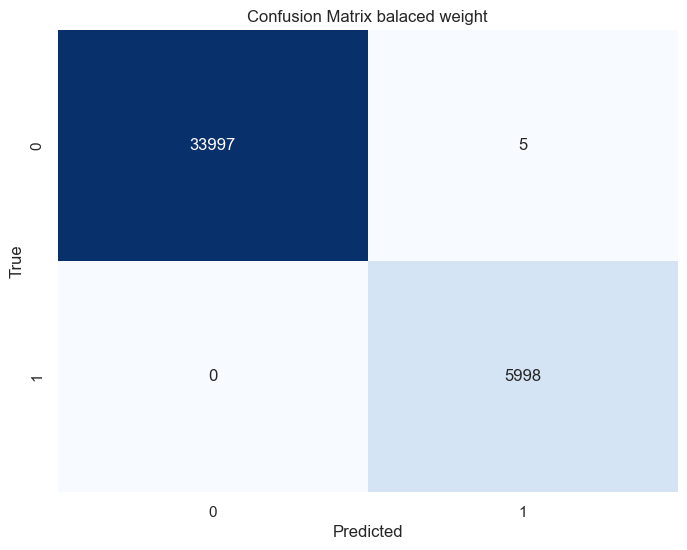

In [85]:
# Set the style for seaborn
sns.set()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix balaced weight')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Analyse feature importance

In [87]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model_balanced.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
                       Feature  Importance
1               purchase_lead    0.123531
2              length_of_stay    0.103143
3                 flight_hour    0.100602
818  booking_origin_Australia    0.051866
7             flight_duration    0.043984
..                        ...         ...
822    booking_origin_Belarus    0.000000
482              route_JEDPDG    0.000000
827   booking_origin_Bulgaria    0.000000
201              route_CSXPER    0.000000
516              route_KBRXIY    0.000000

[918 rows x 2 columns]


In [88]:
feature_importance.head(10)

,Feature,Importance
1,purchase_lead,0.123531
2,length_of_stay,0.103143
3,flight_hour,0.100602
818,booking_origin_Australia,0.051866
7,flight_duration,0.043984
0,num_passengers,0.039697
865,booking_origin_Malaysia,0.034101
6,wants_in_flight_meals,0.019680
4,wants_extra_baggage,0.017215
5,wants_preferred_seat,0.016309


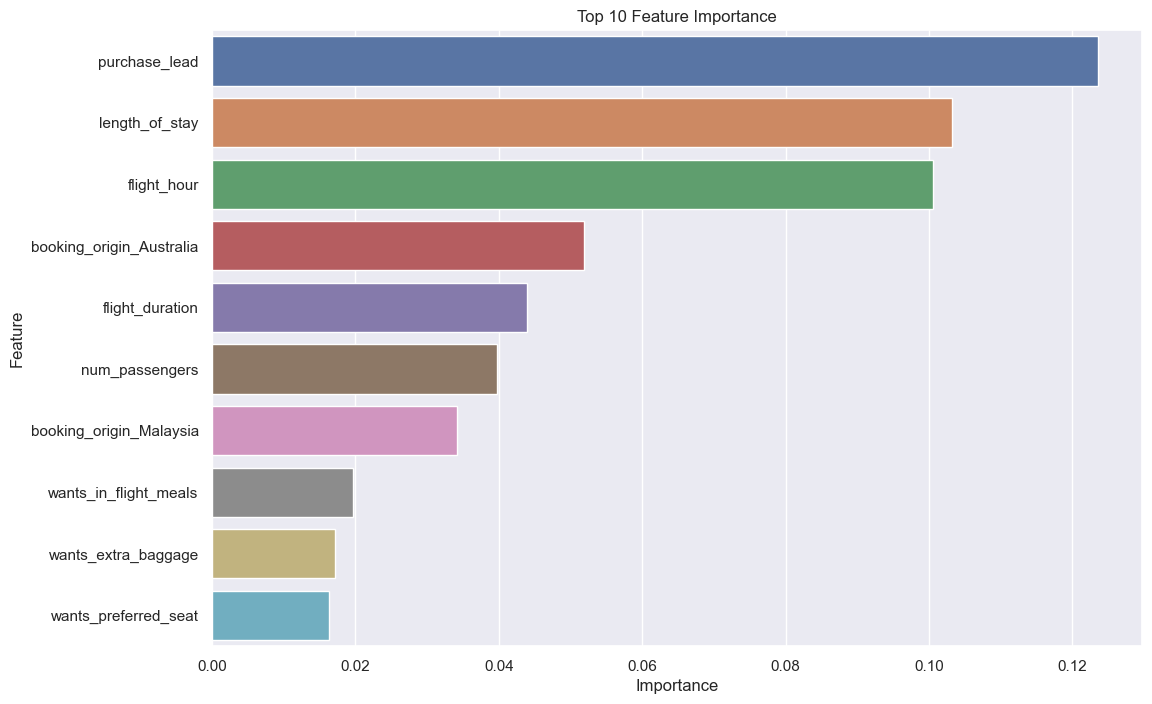

In [89]:
# Create a bar plot for feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))  # Displaying the top 10 features for clarity
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

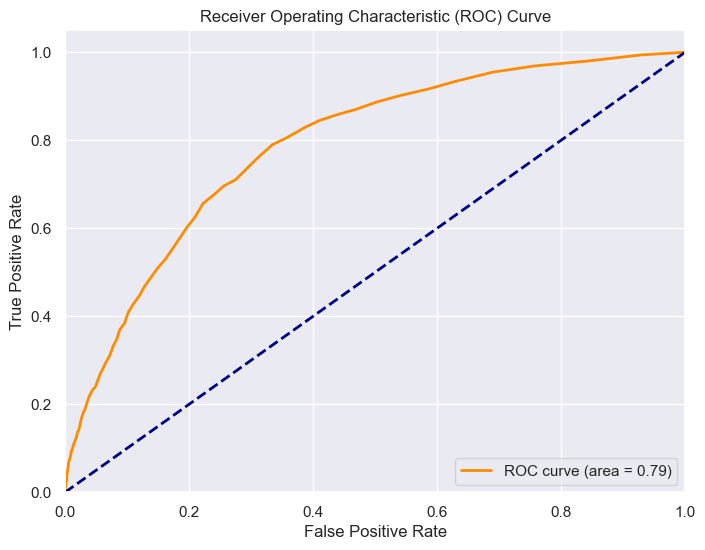

In [91]:
# Plot ROC curve 
if len(rf_model_balanced.classes_) == 2:
    from sklearn.metrics import roc_curve, auc

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, rf_model_balanced.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
print(summary_slide.format(accuracy, conf_matrix, classification_rep_cv))